**Question 6**-
Using the data from Question 3, write code to analyze the data and answer the following questions.

1.Draw plots to demonstrate the analysis for the following questions for better visualizations.

2.Write code comments wherever required for code understanding

Insights to be drawn -
* Get all Pokemons whose spawn rate is less than 5%
* Get all Pokemons that have less than 4 weaknesses
* Get all Pokemons that have no multipliers at all
* Get all Pokemons that do not have more than 2 evolutions
* Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
* Get all Pokemon who have more than two types of capabilities

In [1]:
import pandas as pd
#Loading the json data
data=pd.read_json('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')

In [2]:
#Changing nested json to dataframe
from pandas.io.json import json_normalize
pokemon_data = json_normalize(data['pokemon'])

C:\Users\Upasana\AppData\Local\Temp/ipykernel_17436/4103419672.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  pokemon_data = json_normalize(data['pokemon'])


In [3]:
#Formatting height, weight and egg
pokemon_data['height']=pokemon_data.height.str.rstrip(' m')
pokemon_data['weight']=pokemon_data.weight.str.rstrip(' kg')
pokemon_data['egg']=pokemon_data.egg.str.rstrip(' km')

In [4]:
#Checking dataypes of columns
pokemon_data.dtypes

id                  int64
num                object
name               object
img                object
type               object
height             object
weight             object
candy              object
candy_count       float64
egg                object
spawn_chance      float64
avg_spawns        float64
spawn_time         object
multipliers        object
weaknesses         object
next_evolution     object
prev_evolution     object
dtype: object

In [5]:
#Checking nulls in different columns
pokemon_data.isna().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         0
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
dtype: int64

In [6]:
#Changing dtype acording to data description given in question
pokemon_data['height']=pokemon_data['height'].astype('float')
pokemon_data['weight']=pokemon_data['weight'].astype('float')
pokemon_data['candy_count']=pokemon_data['candy_count'].fillna(0).astype('int')
pokemon_data['egg']=pokemon_data['egg'].replace(['Not in Eggs','Omanyte Candy'],0).astype('float')
pokemon_data['avg_spawns']=pokemon_data['avg_spawns'].astype('int')

In [7]:
def float_to_int(x):
    x=[round(i) for i in x]
    return x

In [8]:
#Changing list of floats to list of ints
pokemon_data['multipliers']=pokemon_data['multipliers'].fillna("").apply(list)
pokemon_data['multipliers']=pokemon_data['multipliers'].apply(float_to_int)

In [9]:
pokemon_data.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99,13.0,Bulbasaur Candy,100,0.0,0.042,4,07:00,"[1, 2]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01,100.0,Bulbasaur Candy,0,0.0,0.017,1,11:30,[],"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,[2],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09,19.0,Charmander Candy,100,0.0,0.012,1,19:00,[2],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


**Get all Pokemons whose spawn rate is less than 5%**

spawn_chance=spawn rate=avg_spawns/10000

In [10]:
pokemon_spawn_rate_less_than_5=list(pokemon_data[pokemon_data.spawn_chance<5.0].name.unique())

In [11]:
pokemon_spawn_rate_less_than_5

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Kakuna',
 'Beedrill',
 'Pidgeotto',
 'Pidgeot',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran ♀ (Female)',
 'Nidorina',
 'Nidoqueen',
 'Nidoran ♂ (Male)',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Tentacool',
 'Tentacruel',
 'Geodude',
 'Graveler',
 'Golem',
 'Ponyta',
 'Rapidash',
 'Slowpoke',
 'Slowbro',
 'Magnemite',
 'Ma

In [12]:
len(pokemon_spawn_rate_less_than_5)           #147 pokemons have less than 5% spawn rate

147

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
pokemon_data['spawn_chance'].max()

15.98

<AxesSubplot:xlabel='spawn_chance', ylabel='Count'>

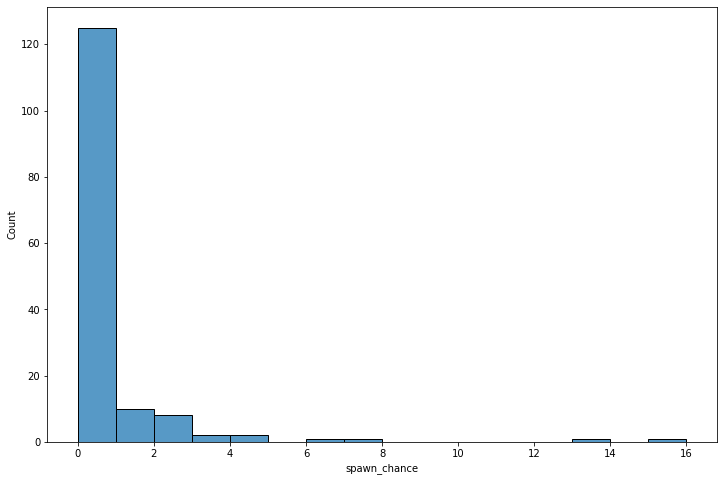

In [17]:
bins=np.arange(0,17)
plt.figure(figsize=(12,8))
sns.histplot(data=pokemon_data, x="spawn_chance",bins=bins)
#A large nuumber of data has spawn_chance<1

Text(0, 0.5, 'Percentage')

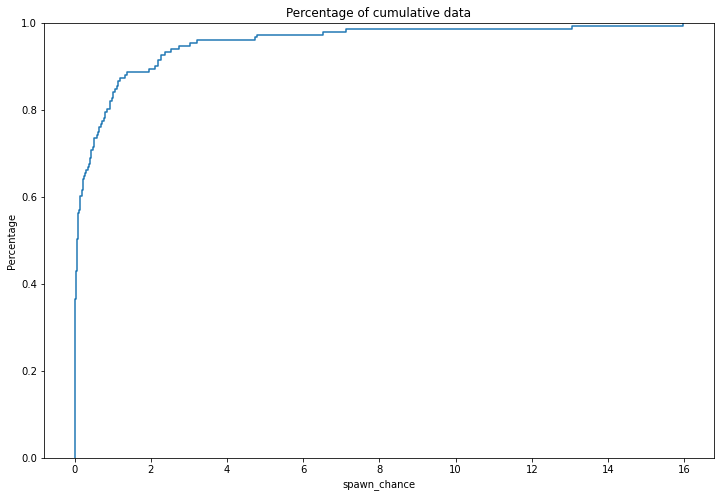

In [18]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=pokemon_data, x="spawn_chance")
plt.title('Percentage of cumulative data')
plt.ylabel('Percentage')

**Get all Pokemons that have less than 4 weaknesses**

In [19]:
#Creating a column counting the number of weaknesses of each pokemon
pokemon_data['weakness_count']=pokemon_data['weaknesses'].apply(lambda x: len(x))

In [20]:
pokemon_weakness_less_than_4=list(pokemon_data[pokemon_data.weakness_count<4].name.unique())

In [21]:
pokemon_weakness_less_than_4

['Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran ♀ (Female)',
 'Nidorina',
 'Nidoran ♂ (Male)',
 'Nidorino',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Tentacool',
 'Tentacruel',
 'Ponyta',
 'Rapidash',
 'Magnemite',
 'Magneton',
 "Farfetch'd",
 'Doduo',
 'Dodrio',
 'Seel',
 'Grimer',
 'Muk',
 'Shellder',
 'Drowzee',
 'Hypno',
 'Krabby',
 'Kingler',
 'Voltorb',
 'Electrode',
 'Cubone',
 'Marowak',
 'Hitmonlee',
 'Hitmonchan',
 'Lickitung',
 'Koffing',
 'Weezing',
 'Chansey',
 'Kangaskhan',
 'Horsea',
 'Seadra',

In [22]:
len(pokemon_weakness_less_than_4)                #102 pokemons have less than 4 weaknesses

102

In [23]:
pokemon_data['weakness_count'].max()

7

<AxesSubplot:xlabel='weakness_count', ylabel='count'>

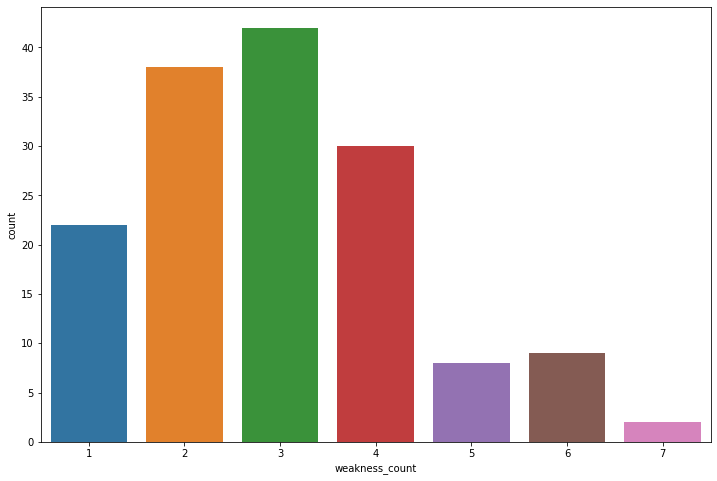

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=pokemon_data, x="weakness_count")
#A large nuumber of data has spawn_chance<1

Text(0, 0.5, 'Percentage')

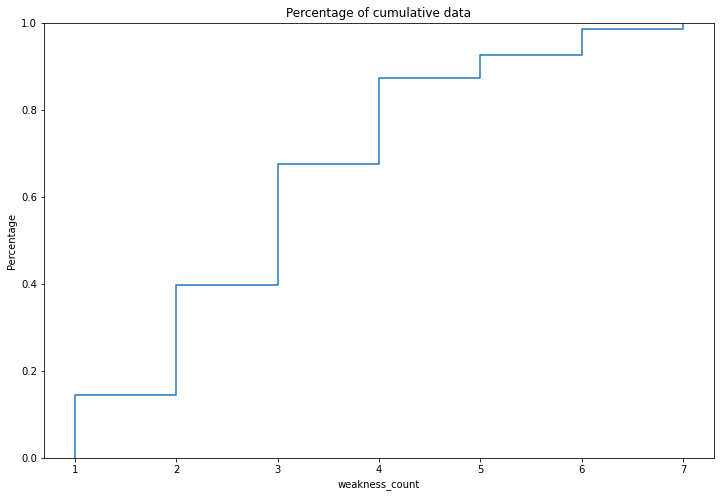

In [25]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=pokemon_data, x="weakness_count")
plt.title('Percentage of cumulative data')
plt.ylabel('Percentage')

**Get all Pokemons that have no multipliers at all.**

In [26]:
#Changing multipliers type from string to list and creating a column that contains True if Pokemon has no multiplier
pokemon_data['multiplier_count']=pokemon_data['multipliers'].apply(lambda x: len(x))

In [27]:
pokemon_no_multiplier=list(pokemon_data[pokemon_data.multiplier_count==0].name.unique())

In [28]:
pokemon_no_multiplier

['Venusaur',
 'Charizard',
 'Blastoise',
 'Butterfree',
 'Beedrill',
 'Pidgeot',
 'Raticate',
 'Fearow',
 'Arbok',
 'Raichu',
 'Sandslash',
 'Nidoqueen',
 'Nidoking',
 'Clefable',
 'Ninetales',
 'Wigglytuff',
 'Golbat',
 'Vileplume',
 'Parasect',
 'Venomoth',
 'Dugtrio',
 'Persian',
 'Golduck',
 'Primeape',
 'Arcanine',
 'Poliwrath',
 'Alakazam',
 'Machamp',
 'Victreebel',
 'Tentacruel',
 'Golem',
 'Rapidash',
 'Slowbro',
 'Magneton',
 "Farfetch'd",
 'Dodrio',
 'Dewgong',
 'Muk',
 'Cloyster',
 'Gengar',
 'Onix',
 'Hypno',
 'Kingler',
 'Electrode',
 'Exeggutor',
 'Marowak',
 'Hitmonlee',
 'Hitmonchan',
 'Lickitung',
 'Weezing',
 'Rhydon',
 'Chansey',
 'Tangela',
 'Kangaskhan',
 'Seadra',
 'Seaking',
 'Starmie',
 'Mr. Mime',
 'Scyther',
 'Jynx',
 'Electabuzz',
 'Magmar',
 'Pinsir',
 'Tauros',
 'Gyarados',
 'Lapras',
 'Ditto',
 'Vaporeon',
 'Jolteon',
 'Flareon',
 'Porygon',
 'Omastar',
 'Kabutops',
 'Aerodactyl',
 'Snorlax',
 'Articuno',
 'Zapdos',
 'Moltres',
 'Dragonite',
 'Mewtwo',
 '

In [29]:
len(pokemon_no_multiplier)               #81 Pokemons have no multipliers

81

<AxesSubplot:xlabel='multiplier_count', ylabel='count'>

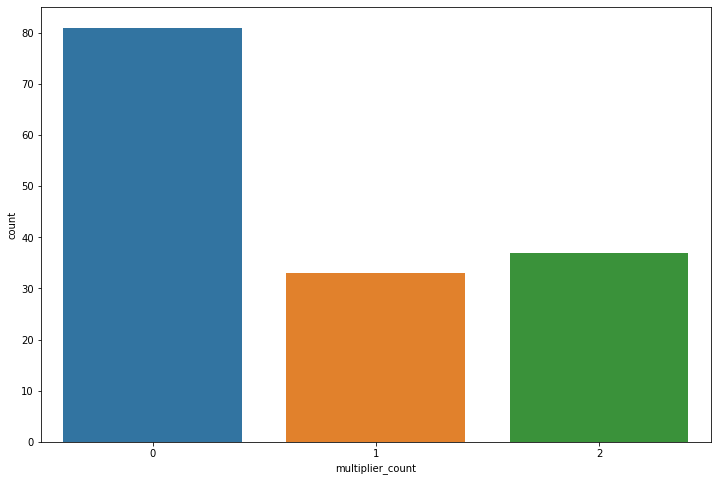

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data=pokemon_data, x="multiplier_count")
#There are more pokemons with no multipliers than pokemons with multipliers

**Get all Pokemons that do not have more than 2 evolutions**

In [31]:
#Creating a column to keep count of number of evolutions
pokemon_data['evolution_count']=pokemon_data['next_evolution'].fillna("").apply(list).apply(lambda x: len(x) )

In [32]:
pokemon_less_than_3_evolutions=list(pokemon_data[pokemon_data['evolution_count']<=2].name.unique())

In [33]:
pokemon_less_than_3_evolutions

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran ♀ (Female)',
 'Nidorina',
 'Nidoqueen',
 'Nidoran ♂ (Male)',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Tentacool',
 'Tentacruel',
 'Geodude',
 'Graveler',
 'Golem',
 'Ponyta',
 'Rapidash',

In [34]:
len(pokemon_less_than_3_evolutions)              #150 pokemons have no more than 2 evolutions ie less than 3 evolutions 

150

<AxesSubplot:xlabel='evolution_count', ylabel='count'>

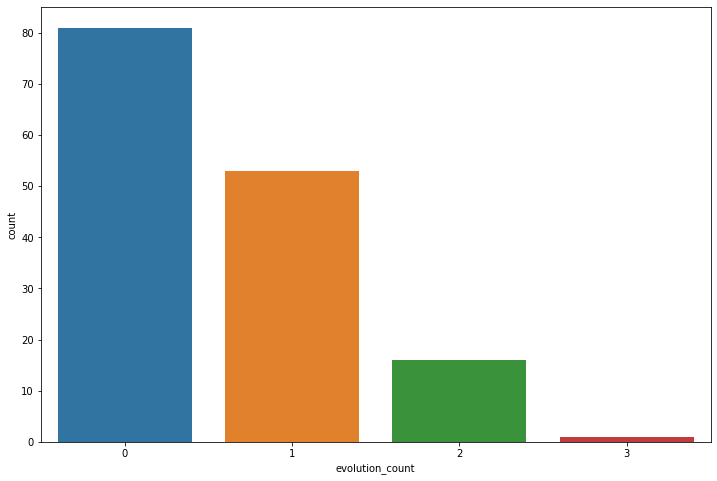

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(data=pokemon_data, x="evolution_count")
#There are very few pokemons with more than 2 evolutions

**Get all Pokemons whose spawn time is less than 300 seconds. Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.**

In [36]:
def minToSec(value):
    m,s=value.split(':')
    return int(m)*60+int(s)

In [37]:
#Replacing nulls and creating a coulmn to store spawn_time values in second.
pokemon_data['spawn_time']=pokemon_data['spawn_time'].replace('N/A','00:00')
pokemon_data['spawn_time_sec']=pokemon_data['spawn_time'].apply(minToSec) 

In [38]:
pokemon_spawn_less_than_300=list(pokemon_data[pokemon_data.spawn_time_sec<300].name.unique())

In [39]:
pokemon_spawn_less_than_300

['Squirtle',
 'Blastoise',
 'Metapod',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Fearow',
 'Arbok',
 'Pikachu',
 'Sandshrew',
 'Nidoran ♀ (Female)',
 'Nidoran ♂ (Male)',
 'Clefairy',
 'Clefable',
 'Ninetales',
 'Golbat',
 'Oddish',
 'Paras',
 'Parasect',
 'Venonat',
 'Diglett',
 'Meowth',
 'Persian',
 'Psyduck',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwrath',
 'Abra',
 'Machop',
 'Machamp',
 'Bellsprout',
 'Tentacool',
 'Graveler',
 'Ponyta',
 'Rapidash',
 'Slowbro',
 'Magnemite',
 "Farfetch'd",
 'Dodrio',
 'Muk',
 'Cloyster',
 'Gastly',
 'Haunter',
 'Gengar',
 'Onix',
 'Drowzee',
 'Hypno',
 'Krabby',
 'Kingler',
 'Voltorb',
 'Electrode',
 'Cubone',
 'Marowak',
 'Hitmonlee',
 'Lickitung',
 'Rhyhorn',
 'Chansey',
 'Kangaskhan',
 'Horsea',
 'Seadra',
 'Goldeen',
 'Mr. Mime',
 'Electabuzz',
 'Pinsir',
 'Tauros',
 'Gyarados',
 'Ditto',
 'Jolteon',
 'Porygon',
 'Kabuto',
 'Articuno',
 'Zapdos',
 'Moltres',
 'Mewtwo',
 'Mew']

In [40]:
len(pokemon_spawn_less_than_300)            #81 pokemons have spawn time less than 300 seconds

81

In [41]:
pokemon_data.spawn_time_sec.max()

1438

Text(0.5, 1.0, 'Count of pokemons with different spawn time in seconds')

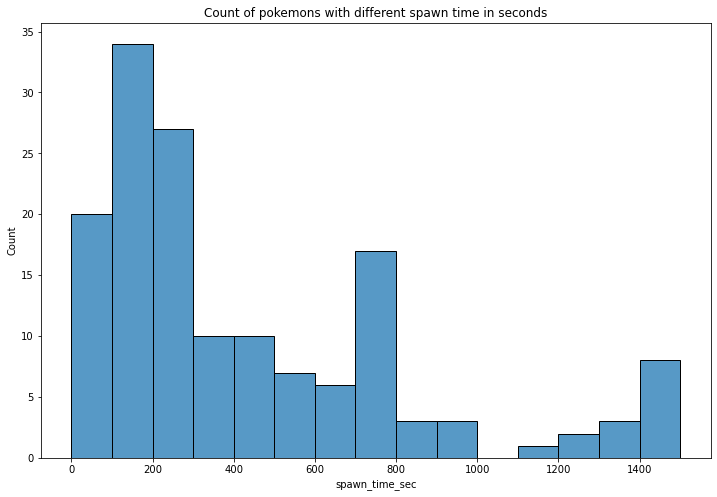

In [42]:
bins=range(0,1501,100)
plt.figure(figsize=(12,8))
sns.histplot(data=pokemon_data, x="spawn_time_sec",bins=bins)
plt.title('Count of pokemons with different spawn time in seconds')

**Get all Pokemon who have more than two types of capabilities**

In [43]:
pokemon_data.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weakness_count,multiplier_count,evolution_count,spawn_time_sec
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71,6.9,Bulbasaur Candy,25,2.0,...,69,20:00,[2],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,1,2,1200
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99,13.0,Bulbasaur Candy,100,0.0,...,4,07:00,"[1, 2]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,2,1,420
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01,100.0,Bulbasaur Candy,0,0.0,...,1,11:30,[],"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,0,0,690
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61,8.5,Charmander Candy,25,2.0,...,25,08:45,[2],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,1,2,525
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09,19.0,Charmander Candy,100,0.0,...,1,19:00,[2],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1,1,1140


In [44]:
#Not sure which column to use to look for Pokemon capabilities